In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
pwd

'C:\\Users\\Deepika Chimote'

In [3]:
cd Downloads/

C:\Users\Deepika Chimote\Downloads


In [4]:
red_wine = pd.read_csv('winequality-red.csv')
white_wine = pd.read_csv('winequality-white.csv')

In [5]:
red_wine = pd.read_csv('winequality-red.csv')
white_wine = pd.read_csv('winequality-white.csv')

## EDA

In [6]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<AxesSubplot:title={'center':'White Wine Quality Scores'}, xlabel='count of wines', ylabel='quality score'>

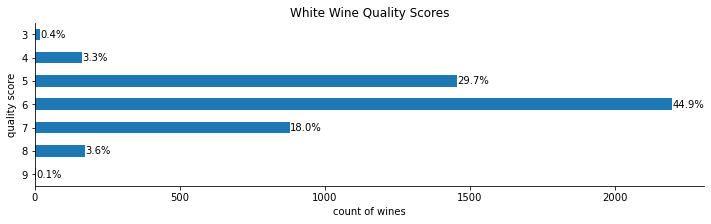

In [11]:
def plot_quality_scores(df,kind):
    ax = df.quality.value_counts().sort_index().plot.barh(title=f'{kind.title()} Wine Quality Scores',figsize=(12,3))
    ax.axes.invert_yaxis()
    for bar in ax.patches:
        ax.text(bar.get_width(),
        bar.get_y()+bar.get_height()/2,
        f'{bar.get_width()/df.shape[0]:.1%}',
        verticalalignment='center')
    plt.xlabel('count of wines')
    plt.ylabel('quality score')
    
    for spine in ['top','right']:
        ax.spines[spine].set_visible(False)
    return ax

plot_quality_scores(white_wine,'white')
    

<AxesSubplot:title={'center':'Red Wine Quality Scores'}, xlabel='count of wines', ylabel='quality score'>

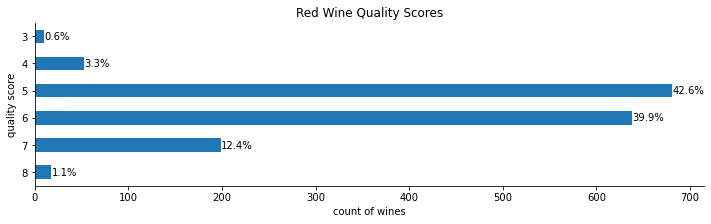

In [12]:
plot_quality_scores(red_wine,'red')

In [13]:
wine = pd.concat([white_wine.assign(kind='white'),red_wine.assign(kind='red')])
#wine.sample(5,random_state=10)
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kind
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red


### EDA on a wine data as a whole

In [14]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  kind                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [32]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [47]:
wine.describe(include='object')

,kind
count,6497
unique,2
top,white
freq,4898


In [49]:
wine.kind.value_counts()

white    4898
red      1599
Name: kind, dtype: int64

### Clustering to seperate white and red wines

In [18]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [19]:
y=wine.kind
X = wine.drop(columns=['quality','kind'])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0,stratify=y)

kmeans_pipeline = Pipeline([('scale',StandardScaler()),('kmeans',KMeans(n_clusters=2, random_state=0))]).fit(X_train)


### Measure the agreement between predicted wine type and actual 

In [20]:
pd.Series(kmeans_pipeline.predict(X_test)).value_counts()

1    1211
0     414
dtype: int64

In [21]:
y_test.value_counts()

white    1225
red       400
Name: kind, dtype: int64

In [22]:
from sklearn.metrics import fowlkes_mallows_score
# we need to make y_test binary, but which label red becomes doesn't matter for the result
fowlkes_mallows_score(np.where(y_test == 'red', 0, 1), kmeans_pipeline.predict(X_test))

0.9824673716471775

### Finding Centroids

In [23]:
pd.DataFrame(
    kmeans_pipeline.named_steps['kmeans'].cluster_centers_,
    columns=X_train.columns
).T

,0,1
fixed acidity,0.812282,-0.275524
volatile acidity,1.178543,-0.399759
citric acid,-0.368395,0.124959
residual sugar,-0.629024,0.213363
chlorides,0.941155,-0.319237
free sulfur dioxide,-0.843413,0.286084
total sulfur dioxide,-1.191822,0.404263
density,0.663534,-0.225069
pH,0.573143,-0.194409
sulphates,0.848734,-0.287888
